## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.4, 0.25]

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with drop ration = %.6f" % (drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss5 = model.history.history["loss"]
    valid_loss5 = model.history.history["val_loss"]
    train_acc5 = model.history.history["accuracy"]
    valid_acc5 = model.history.history["val_accuracy"]
    
    exp_name_tag5 = "exp-drop 5-%s" % str(drp_ratio)
    results[exp_name_tag5] = {'train-loss': train_loss5,
                             'valid-loss': valid_loss5,
                             'train-acc': train_acc5,
                             'valid-acc': valid_acc5}


Experiment with drop ration = 0.250000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout) 

50000/50000 [==============================] - 7s 149us/step - loss: 1.6672 - accuracy: 0.4046 - val_loss: 1.5830 - val_accuracy: 0.4439
Epoch 43/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6663 - accuracy: 0.4063 - val_loss: 1.6003 - val_accuracy: 0.4404
Epoch 44/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6594 - accuracy: 0.4058 - val_loss: 1.5708 - val_accuracy: 0.4488
Epoch 45/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6584 - accuracy: 0.4042 - val_loss: 1.5973 - val_accuracy: 0.4360
Epoch 46/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6571 - accuracy: 0.4084 - val_loss: 1.5991 - val_accuracy: 0.4377
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6530 - accuracy: 0.4109 - val_loss: 1.5772 - val_accuracy: 0.4430
Epoch 48/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6546 - accuracy: 0.4085 - val_loss:

In [18]:
for drp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with drop ration = %.6f" % (drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio,num_neurons=[512, 256, 128])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "3exp-drop-%s" % str(drp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with drop ration = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout) 

Epoch 46/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.9504 - accuracy: 0.2565 - val_loss: 2.0109 - val_accuracy: 0.2680
Epoch 47/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9493 - accuracy: 0.2549 - val_loss: 2.0331 - val_accuracy: 0.2531
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9576 - accuracy: 0.2549 - val_loss: 2.0251 - val_accuracy: 0.2695
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9571 - accuracy: 0.2525 - val_loss: 2.0163 - val_accuracy: 0.2603
Epoch 50/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9495 - accuracy: 0.2549 - val_loss: 2.0126 - val_accuracy: 0.2674
Experiment with drop ration = 0.400000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_

Epoch 41/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7307 - accuracy: 0.3733 - val_loss: 1.7301 - val_accuracy: 0.3935
Epoch 42/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7360 - accuracy: 0.3729 - val_loss: 1.6902 - val_accuracy: 0.4172
Epoch 43/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7214 - accuracy: 0.3757 - val_loss: 1.7049 - val_accuracy: 0.3980
Epoch 44/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7243 - accuracy: 0.3746 - val_loss: 1.7307 - val_accuracy: 0.3975
Epoch 45/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7353 - accuracy: 0.3724 - val_loss: 1.7026 - val_accuracy: 0.4075
Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7299 - accuracy: 0.3682 - val_loss: 1.6864 - val_accuracy: 0.4105
Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7267 - accuracy: 0.3718

Epoch 36/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5074 - accuracy: 0.4585 - val_loss: 1.4671 - val_accuracy: 0.4849
Epoch 37/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4978 - accuracy: 0.4622 - val_loss: 1.4734 - val_accuracy: 0.4755
Epoch 38/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4951 - accuracy: 0.4623 - val_loss: 1.4539 - val_accuracy: 0.4858
Epoch 39/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4930 - accuracy: 0.4626 - val_loss: 1.4477 - val_accuracy: 0.4885
Epoch 40/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4933 - accuracy: 0.4637 - val_loss: 1.4442 - val_accuracy: 0.4827
Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4955 - accuracy: 0.4615 - val_loss: 1.4562 - val_accuracy: 0.4847
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4813 - accuracy: 0.4671

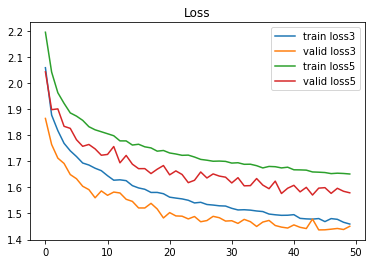

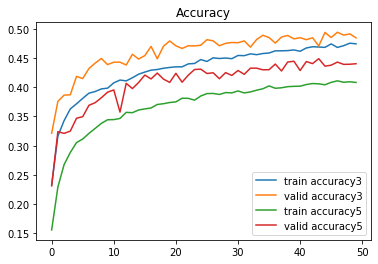

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss3")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss3")
plt.plot(range(len(train_loss5)), train_loss5, label="train loss5")
plt.plot(range(len(valid_loss5)), valid_loss5, label="valid loss5")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy3")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy3")
plt.plot(range(len(train_acc5)), train_acc5, label="train accuracy5")
plt.plot(range(len(valid_acc5)), valid_acc5, label="valid accuracy5")
plt.legend()
plt.title("Accuracy")
plt.show()